In [1]:
%run "import_ntbk.ipynb"

In [4]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [5]:
df = pd.read_csv('DS_assessment.csv')

In [6]:
# =====================================================
# 1. Data Cleaning and Processing and Enrichments 
# =====================================================


df.columns = [c.strip() for c in df.columns]

# Change string categorical data into Numerical category data  YES : 1 & NO :0
# Example: if Personal Loan is 'Personal Loan' with YES/NO -> map to 1/0


# if df['Personal Loan'].dtype == object:
#     df['Personal Loan'] = df['Personal Loan'].str.strip().str.lower().map({'yes':1, 'no':0, 'y':1, 'n':0})

# Convert InternetBanking to binary if string
if df['InternetBanking'].dtype == object:
    df['InternetBanking'] = df['InternetBanking'].str.strip().str.lower().map({'yes':1, 'no':0, 'y':1, 'n':0})

# Ensure Investment Account and Deposit Account numeric 0/1
for col in ['Investment Account', 'Deposit Account']:
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip().map({'1':1,'0':0,'yes':1,'no':0,'y':1,'n':0}).astype(float)

edu_map = {
    'Undergrad': 1,
    'Graduate': 2,
    'Advanced Degree': 3
}
df['Education'] = df['Education'].map(edu_map).astype(int)


df['Income'] = df['Income'] * 1000
df['Mortgage'] = df['Mortgage'] * 1000
df['CCAvgSpending'] = df['CCAvgSpending'] * 1000

# Monthly income
df['MonthlyIncome'] = df['Income'] / 12

# Spending ratio (CC spending per month vs monthly income)
df['SpendingCCToIncomeRatio'] = (df['CCAvgSpending'] / df['MonthlyIncome']) * 100

df = df[['ID', 'Age', 'Experience', 'Income', 'Postal Code', 'Family Size',
       'CCAvgSpending', 'Education', 'Mortgage', 'Investment Account',
       'Deposit Account', 'InternetBanking', 'MonthlyIncome', 
       'SpendingCCToIncomeRatio','Personal Loan', ]]
df

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,MonthlyIncome,SpendingCCToIncomeRatio,Personal Loan
0,1,25,1,49000.0,91107,4.0,1600.0,1,0,1,0,0,4083.333333,39.183673,NO
1,2,45,19,34000.0,90089,3.0,1500.0,1,0,1,0,0,2833.333333,52.941176,NO
2,3,39,15,11000.0,94720,1.0,1000.0,1,0,0,0,0,916.666667,109.090909,NO
3,4,35,9,NaN,94112,1.0,2700.0,2,0,0,0,0,NaN,NaN,NO
4,5,35,8,45000.0,91330,4.0,1000.0,2,0,0,0,0,3750.000000,26.666667,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40000.0,92697,1.0,1900.0,3,0,0,0,1,3333.333333,57.000000,NO
4996,4997,30,4,15000.0,92037,4.0,400.0,1,85000,0,0,1,1250.000000,32.000000,NO
4997,4998,63,39,24000.0,93023,2.0,300.0,3,0,0,0,0,2000.000000,15.000000,NO
4998,4999,65,40,49000.0,90034,3.0,500.0,2,0,0,0,1,4083.333333,12.244898,NO


(5000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Experience               5000 non-null   int64  
 3   Income                   4980 non-null   float64
 4   Postal Code              5000 non-null   int64  
 5   Family Size              4991 non-null   float64
 6   CCAvgSpending            5000 non-null   float64
 7   Education                5000 non-null   int64  
 8   Mortgage                 5000 non-null   int64  
 9   Investment Account       5000 non-null   int64  
 10  Deposit Account          5000 non-null   int64  
 11  InternetBanking          5000 non-null   int64  
 12  MonthlyIncome            4980 non-null   float64
 13  SpendingCCToIncomeRatio  4980 non-null   float64
 14  Personal Loan

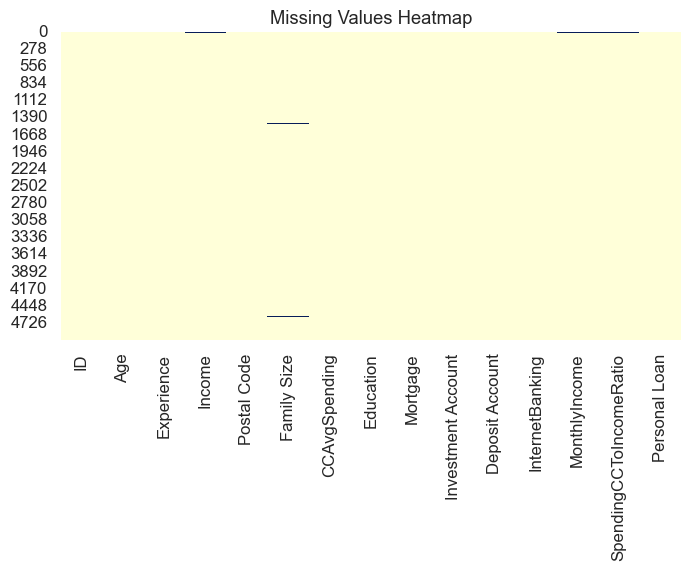

In [7]:
# =====================================================
# 2. Basic Overview
# =====================================================
print(df.shape)
print(df.info())
print(df.describe(include='all').T)

# Check missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

Loan Acceptance Rate (%):
 Personal Loan
NO     90.4
YES     9.6
Name: proportion, dtype: float64


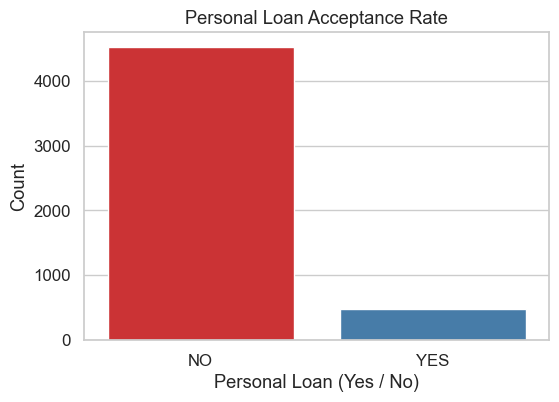

In [8]:
# =====================================================
# 3. Target Variable Distribution
# =====================================================
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Personal Loan', hue='Personal Loan', palette='Set1', legend=False)
plt.title('Personal Loan Acceptance Rate')
plt.xlabel('Personal Loan (Yes / No)')
plt.ylabel('Count')
loan_rate = df['Personal Loan'].value_counts(normalize=True) * 100
print("Loan Acceptance Rate (%):\n", loan_rate)

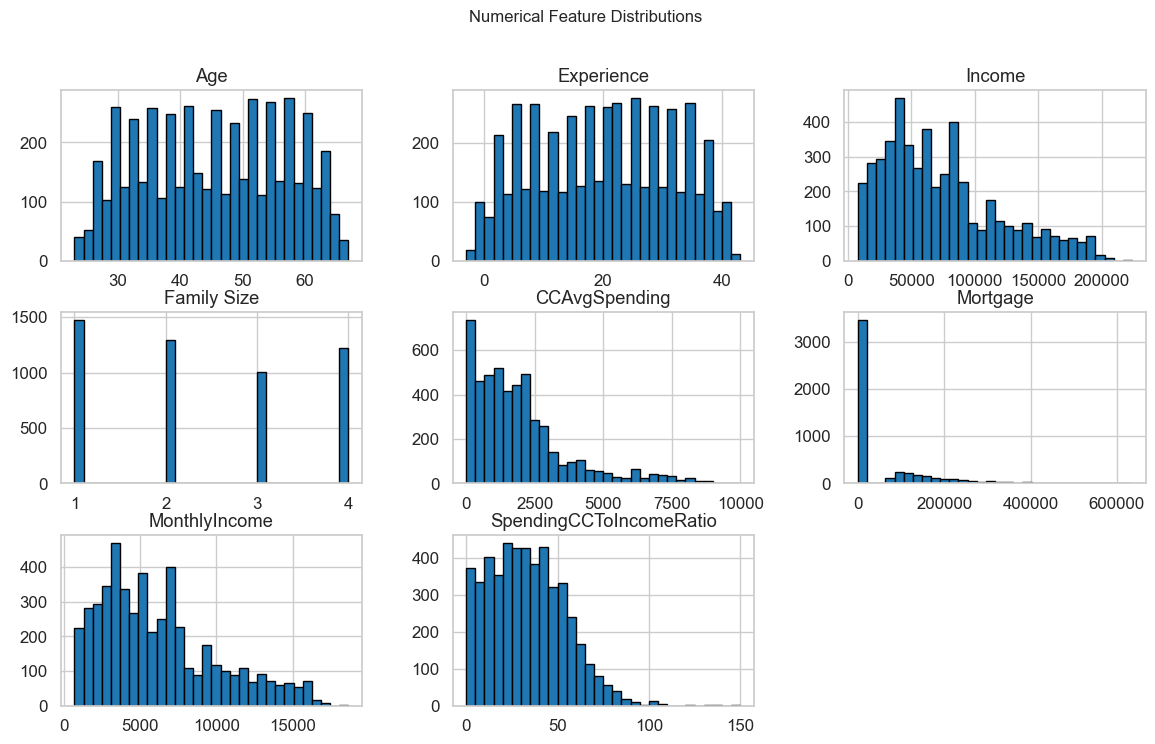

In [9]:
# =====================================================
# 4. Numerical Feature Distributions
# =====================================================
num_cols = ['Age', 'Experience', 'Income', 'Family Size', 'CCAvgSpending', 'Mortgage', 'MonthlyIncome', 'SpendingCCToIncomeRatio',]
df[num_cols].hist(bins=30, figsize=(14, 8), color='#1f77b4', edgecolor='black')
plt.suptitle("Numerical Feature Distributions", fontsize=12)
plt.show()

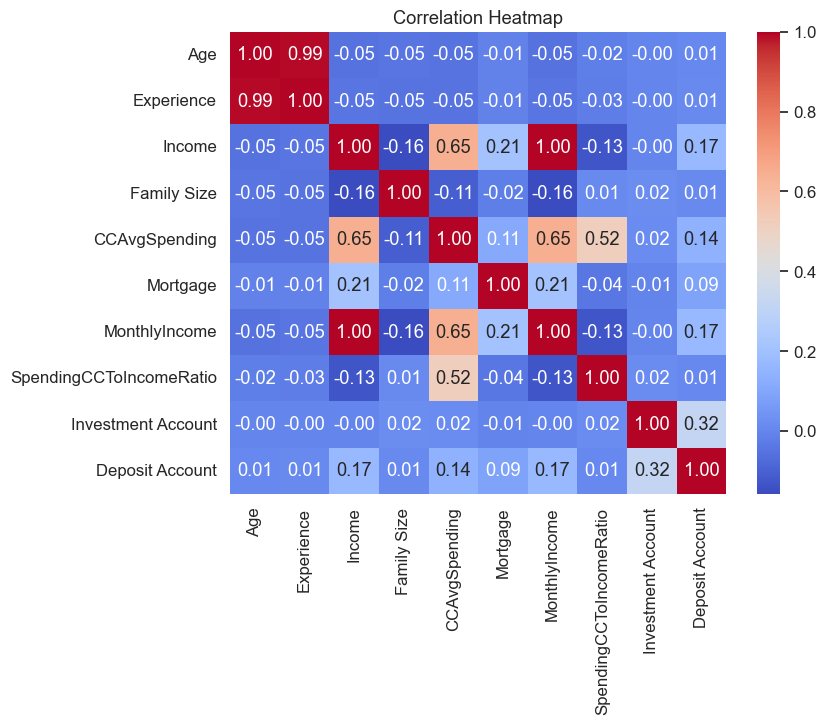

In [12]:
# =====================================================
# 5. Correlation Analysis
# =====================================================
corr = df[num_cols + ['Investment Account', 'Deposit Account']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,MonthlyIncome,SpendingCCToIncomeRatio,Personal Loan
0,1,25,1,49000.0,91107,4.0,1600.0,1,0,1,0,0,4083.333333,39.183673,NO
1,2,45,19,34000.0,90089,3.0,1500.0,1,0,1,0,0,2833.333333,52.941176,NO
2,3,39,15,11000.0,94720,1.0,1000.0,1,0,0,0,0,916.666667,109.090909,NO
3,4,35,9,NaN,94112,1.0,2700.0,2,0,0,0,0,NaN,NaN,NO
4,5,35,8,45000.0,91330,4.0,1000.0,2,0,0,0,0,3750.000000,26.666667,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40000.0,92697,1.0,1900.0,3,0,0,0,1,3333.333333,57.000000,NO
4996,4997,30,4,15000.0,92037,4.0,400.0,1,85000,0,0,1,1250.000000,32.000000,NO
4997,4998,63,39,24000.0,93023,2.0,300.0,3,0,0,0,0,2000.000000,15.000000,NO
4998,4999,65,40,49000.0,90034,3.0,500.0,2,0,0,0,1,4083.333333,12.244898,NO


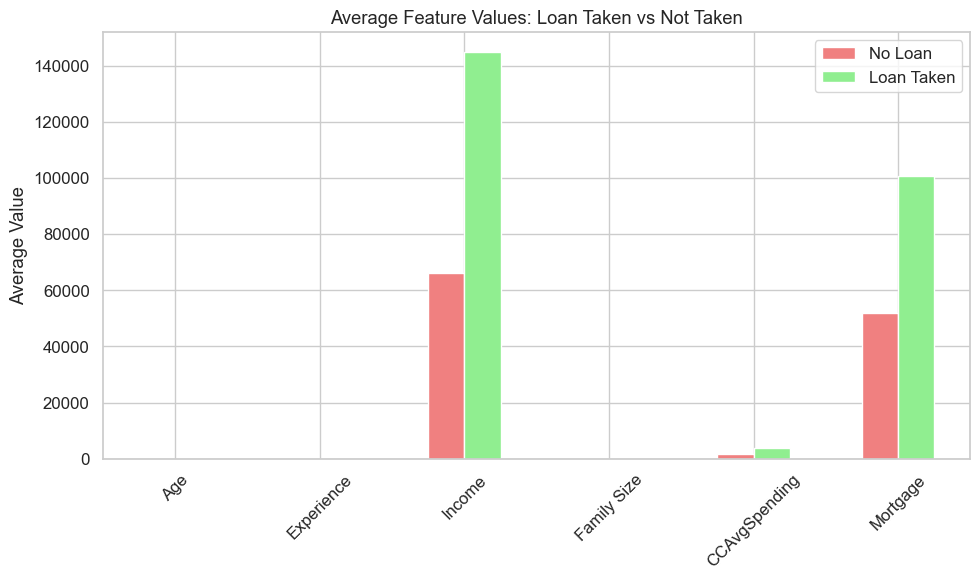

In [15]:
# =====================================================
# 6. Relationship with Target Variable
# =====================================================


# Convert Personal Loan to binary for easier analysis 
df['Loan_Flag'] = df['Personal Loan'].map({'YES': 1, 'NO': 0})

# Keep only meaningful numeric features
num_cols = ['Age', 'Experience', 'Income',
    'Family Size', 'CCAvgSpending', 'Mortgage']

# num_cols = ['Income', 'Family Size', 'CCAvgSpending', 'Mortgage', 'MonthlyIncome', 'SpendingCCToIncomeRatio',]
# num_cols = [ 'CCAvgSpending',  'MonthlyIncome', 'SpendingCCToIncomeRatio',]

# Group by target (Loan_Flag) and compute mean of each numeric feature
loan_grp = df.groupby('Loan_Flag')[num_cols].mean().T

# Plot the comparison
loan_grp.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#F08080', '#90EE90']
)
plt.title("Average Feature Values: Loan Taken vs Not Taken")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(['No Loan', 'Loan Taken'])
plt.tight_layout()
plt.show()

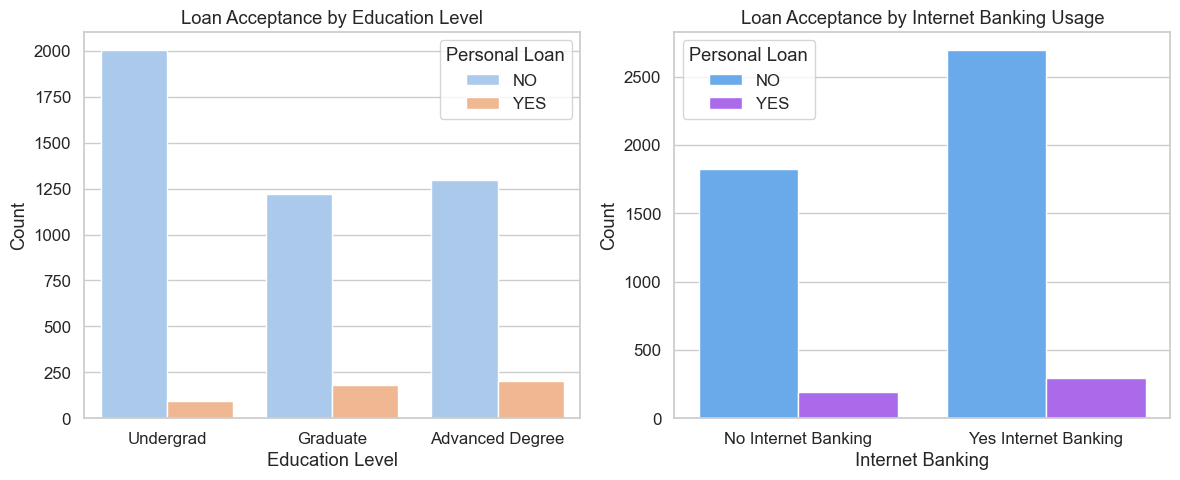

In [17]:
# =====================================================
# 7. Categorical Variables
# =====================================================
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 1️ Education 
edu_labels = {
    1: 'Undergrad',
    2: 'Graduate',
    3: 'Advanced Degree'
}

sns.countplot(
    data=df.assign(EducationLabel=df['Education'].map(edu_labels)),
    x='EducationLabel',
    hue='Personal Loan',
    ax=axs[0],
    palette='pastel'
)
axs[0].set_title("Loan Acceptance by Education Level")
axs[0].set_xlabel("Education Level")
axs[0].set_ylabel("Count")
axs[0].legend(title="Personal Loan")

# 2 Internet Banking
# 1️ Education 
IB_labels = {
    0: 'No Internet Banking',
    1: 'Yes Internet Banking',
}
sns.countplot(
    # data=df,
    data = df.assign(InternetBanking =df['InternetBanking'].map(IB_labels)),
    x='InternetBanking',
    hue='Personal Loan',
    ax=axs[1],
    palette='cool'
)
axs[1].set_title("Loan Acceptance by Internet Banking Usage")
axs[1].set_xlabel("Internet Banking")
axs[1].set_ylabel("Count")
axs[1].legend(title="Personal Loan")

plt.tight_layout()
plt.show()


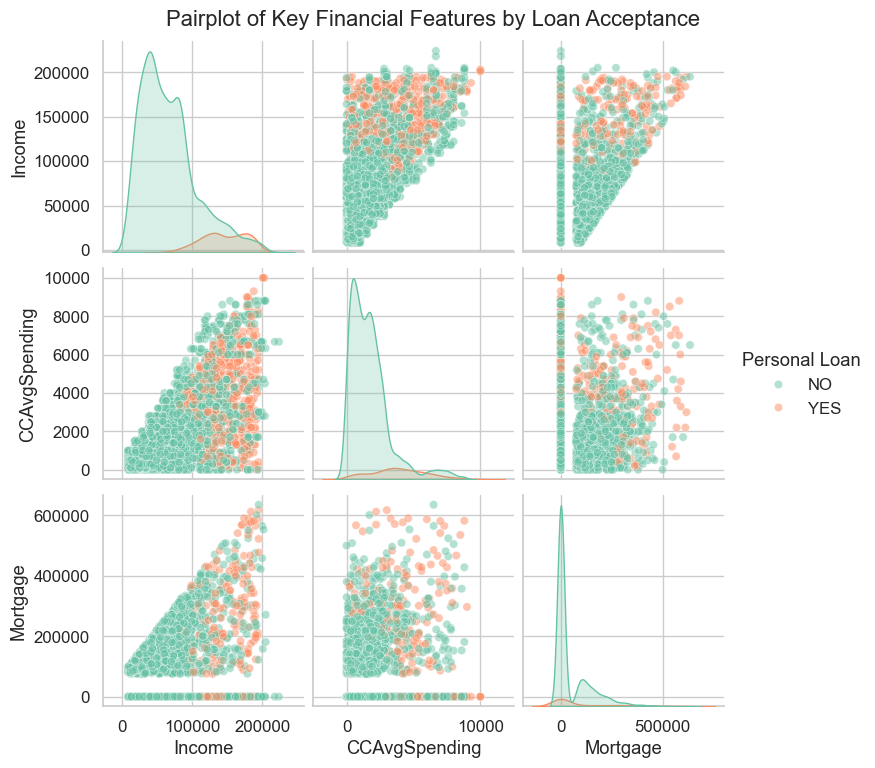

In [18]:
# =====================================================
# 8. Feature Relationships
# =====================================================
sns.pairplot(df, vars=['Income', 'CCAvgSpending', 'Mortgage'], hue='Personal Loan', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Key Financial Features by Loan Acceptance", y=1.02)
plt.show()